In [29]:
# import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy 
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [30]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [31]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:
# Unzip the zip coordinates using a For loop.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-33.69589926642392 175.3907332518565
-40.8395774373907 63.01019146369123
-70.28043068316589 -150.12755579088378
64.2727470460245 -4.58581711084949
50.72346787268131 17.590804970928474
-22.179903491620195 -58.99918758663057
-25.542416864032944 69.59200302437591
-38.31337288080885 -107.31943813497709
-10.897480354709998 -66.82145777182171
-47.616216290599965 3.849302519256355
-37.74359527927999 -67.22305883701792
-37.24692854802931 -110.99059879423106
-38.66767435072494 -21.53032908804377
-72.71513284386138 127.26978131278423
-51.60914805874875 -51.469980111288976
47.691279313896786 144.6922913727155
-5.2273300669447025 -83.51216475017333
-46.899951495571706 -175.96190041398015
-60.33452370537686 -36.68835993201199
82.87946561389887 -172.19852485108828
86.11239132215908 139.77655928897383
-25.138722591764207 4.691610841338189
-81.9736357589098 63.250831672411266
79.88895375136448 -69.93399080367949
-76.5716847112302 0.0024471299471144903
-8.268127940166309 43.83235337296583
-47.120244330

24.113526167870745 -88.45711721704599
-24.025952891864847 -133.5315600135553
54.51801249799897 -6.620986041320947
37.203680312204085 34.30282993566081
-70.15994576235289 -29.375191333372385
35.29691982623666 176.2874684165737
59.377197096858566 -114.56338977768586
-72.94548189014449 57.18922532528478
-35.64426213271527 141.61994385835845
-49.231145174372706 -65.5666917030255
3.970700365075487 -56.20786401882452
80.3565365059836 -115.70829254382105
-31.663636954132876 -71.44097875929045
-72.97343142171138 118.51463379341396
5.629594727438118 161.12605812926432
44.654508066942526 -19.559170087853687
-35.5746250489983 -64.85327708212161
78.05271307117567 -113.2219403437665
74.15916082140836 139.36904047286777
-0.1513375044668237 -135.57033332614975
-76.70397753331886 87.23813061138634
47.183520016908574 125.99589219438701
57.67946102165425 -19.352060972870646
3.56496314246165 -106.62547558449083
-8.561524588460841 -109.13746954200182
-31.401165514155423 -173.0705052531775
-67.975971071907

-88.0988401678956 -179.0085579685301
-17.532621788882793 64.61989233767264
65.10238035615441 -140.0665531961696
23.21299235121043 37.81267335226093
5.263354415603246 -48.62727657582755
71.18311746396444 -70.98585097256347
-42.482517014685854 172.75861052630785
69.29447225028574 168.47832472605245
-4.399381496361357 -158.80590181212793
36.353374278759446 15.952795775456991
40.88983093799192 12.788018508096286
-46.607765535006 94.17245615109982
44.78471403615114 -77.47683453351114
-77.66892391629773 -136.30384968766157
-60.233003072103585 -48.111830250661626
-60.11971044708155 -128.69661589478616
-22.352655715674345 -145.7316673775782
60.448485344420305 104.35529933233778
50.2957734182192 74.54659780615279
-31.23978182939856 100.11661400705168
-71.1350466228239 130.9212608319607
-68.83279390978217 -11.04381922152379
54.15673352689282 75.25569032959652
-2.884926479389989 -175.70053887540192
35.34521831576404 -149.94436067356258
-49.1535739179403 145.76137442456672
-9.544046698833611 -47.3

32.1876053938671 -94.02595895943749
10.0638036061534 -55.12919380971381
22.242906159938173 50.73290318373179
-46.63927070291469 7.450663535358984
-35.412461387711595 168.11763054728277
-61.381887842099616 -157.25739943980207
-60.890769068426245 73.80522225138336
-27.782396357672376 9.435817132344198
-5.30554943728302 -115.42765602625396
67.27073354983605 -141.71649629931764
80.4892122412553 145.80067193434303
23.70490983540347 93.90963175485797
46.20953178983865 116.39436915533003
15.779541906543287 -26.955497591006974
11.674208419334448 -97.75575576663867
1.1588300205294644 -64.44925515628509
47.98948840477712 -24.738575231687662
49.65761803010162 65.01811378410827
-15.601005897731028 -0.09788306017026116
39.00169248098118 176.78531069614502
32.84334047716344 134.578026689819
-68.52876482792188 -103.75968548386065
-87.74042916854846 -158.39734028215022
81.38011004701167 -36.900218888712374
57.391466373617504 -99.62600156545963
-0.24512593242873493 -134.9813472465773
-62.85216618530049

-41.9922064960999 -166.30648431512557
-28.258488514548368 -168.44836200855414
45.09046367193025 34.80847554073685
44.85264314272442 -87.77228947340764
64.40065371464644 64.32462864162326
35.28427974298641 -163.7306649810019
58.57729755001179 -3.588704074559871
-31.8478057652298 -31.233591816472057
19.31545859270956 75.84862255925711
47.47865971443099 132.1316934517955
57.45215611461356 69.08828598266976
88.28935660087564 -28.272016643270888
71.18798793155216 -159.7863414400957
27.936799950431336 -109.90134496949153
46.724588346333064 147.9598577237004
50.073110192717195 72.20854657636056
4.298221006362226 -91.21756858057672
51.47042089670768 62.66027210506223
-54.34172095389167 -3.2244499075177373
1.834434473325203 112.41716278320496
27.138326795168908 -33.90746794480151
30.52917521920419 -8.90168578805691
17.745453019429874 129.51131377725528
69.39501822230116 21.281506191354595
26.89306642036982 175.0527116493348
43.45394283217345 78.5229861273948
86.6296514454778 -39.70728049128988


In [32]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc2fb58608de7fa9af1eaa505d920aaa


In [33]:
# Create a list for holding the cities.
cities = []
# Identify nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

585

In [47]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [48]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | mandalgovi
Processing Record 2 of Set 1 | port hardy
Processing Record 3 of Set 1 | ponta do sol
Processing Record 4 of Set 1 | guasdualito
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | carora
Processing Record 7 of Set 1 | katherine
Processing Record 8 of Set 1 | bargal
City not found. Skipping...
Processing Record 9 of Set 1 | tuatapere
Processing Record 10 of Set 1 | meulaboh
Processing Record 11 of Set 1 | kapuskasing
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | yei
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | samusu
City not found. Skipping...
Processing Record 20 of Set 1 | ixtapa
Processing Record 21 of Set 1 | harwich
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | butaritari

Processing Record 36 of Set 4 | walvis bay
Processing Record 37 of Set 4 | gangotri
City not found. Skipping...
Processing Record 38 of Set 4 | yumen
Processing Record 39 of Set 4 | tasiilaq
Processing Record 40 of Set 4 | zonguldak
Processing Record 41 of Set 4 | avera
Processing Record 42 of Set 4 | bontang
Processing Record 43 of Set 4 | araouane
Processing Record 44 of Set 4 | bathsheba
Processing Record 45 of Set 4 | porto seguro
Processing Record 46 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 4 | vao
Processing Record 48 of Set 4 | half moon bay
Processing Record 49 of Set 4 | ilulissat
Processing Record 50 of Set 4 | talaya
Processing Record 1 of Set 5 | lusambo
Processing Record 2 of Set 5 | ashikaga
Processing Record 3 of Set 5 | sur
Processing Record 4 of Set 5 | warrnambool
Processing Record 5 of Set 5 | lolua
City not found. Skipping...
Processing Record 6 of Set 5 | gamba
Processing Record 7 of Set 5 | moron
Processing Record 8

Processing Record 26 of Set 8 | yulara
Processing Record 27 of Set 8 | ploemeur
Processing Record 28 of Set 8 | dalvik
Processing Record 29 of Set 8 | pimentel
Processing Record 30 of Set 8 | hay river
Processing Record 31 of Set 8 | malhador
Processing Record 32 of Set 8 | cockburn town
Processing Record 33 of Set 8 | ugoofaaru
Processing Record 34 of Set 8 | sao miguel do araguaia
Processing Record 35 of Set 8 | saryg-sep
Processing Record 36 of Set 8 | zlatoustovsk
City not found. Skipping...
Processing Record 37 of Set 8 | port macquarie
Processing Record 38 of Set 8 | aklavik
Processing Record 39 of Set 8 | mawlaik
Processing Record 40 of Set 8 | beitbridge
Processing Record 41 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 42 of Set 8 | krasnoselkup
Processing Record 43 of Set 8 | amuntai
Processing Record 44 of Set 8 | port-gentil
Processing Record 45 of Set 8 | lorengau
Processing Record 46 of Set 8 | labuhan
Processing Record 47 of Set 8 | chomun
City n

Processing Record 16 of Set 12 | monjas
Processing Record 17 of Set 12 | byron bay
Processing Record 18 of Set 12 | suhut
Processing Record 19 of Set 12 | nurota
Processing Record 20 of Set 12 | nacala
Processing Record 21 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 22 of Set 12 | srednekolymsk
Processing Record 23 of Set 12 | mananara
Processing Record 24 of Set 12 | dwarka
Processing Record 25 of Set 12 | lazurne
Processing Record 26 of Set 12 | kozarmisleny
Processing Record 27 of Set 12 | mount darwin
Processing Record 28 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 29 of Set 12 | price
Processing Record 30 of Set 12 | chunskiy
Processing Record 31 of Set 12 | bogorodskoye
Processing Record 32 of Set 12 | vallenar
Processing Record 33 of Set 12 | veraval
Processing Record 34 of Set 12 | shiyan
Processing Record 35 of Set 12 | carutapera
-----------------------------
Data Retrieval Complete      
-----------------------------


In [50]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mandalgovi,45.7625,106.2708,47.25,35,8,7.92,MN,2021-05-09 18:55:51
1,Port Hardy,50.6996,-127.4199,51.80,87,75,8.05,CA,2021-05-09 18:55:51
2,Ponta Do Sol,32.6667,-17.1000,66.00,59,45,1.99,PT,2021-05-09 18:55:51
3,Guasdualito,7.2424,-70.7324,80.60,74,92,5.75,VE,2021-05-09 18:55:52
4,Ribeira Grande,38.5167,-28.7000,62.60,67,75,11.50,PT,2021-05-09 18:55:52
5,Carora,10.1755,-70.0827,75.56,77,100,4.74,VE,2021-05-09 18:55:52
6,Katherine,-14.4667,132.2667,64.40,77,2,4.61,AU,2021-05-09 18:55:53
7,Tuatapere,-46.1333,167.6833,46.00,96,29,1.01,NZ,2021-05-09 18:55:53
8,Meulaboh,4.1363,96.1285,78.19,88,100,2.95,ID,2021-05-09 18:55:53
9,Kapuskasing,49.4169,-82.4331,41.00,75,100,6.91,CA,2021-05-09 18:55:54


In [51]:
new_column_order = ["City","Country","Date","Lat","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [52]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mandalgovi,MN,2021-05-09 18:55:51,45.7625,47.25,35,8,7.92
1,Port Hardy,CA,2021-05-09 18:55:51,50.6996,51.80,87,75,8.05
2,Ponta Do Sol,PT,2021-05-09 18:55:51,32.6667,66.00,59,45,1.99
3,Guasdualito,VE,2021-05-09 18:55:52,7.2424,80.60,74,92,5.75
4,Ribeira Grande,PT,2021-05-09 18:55:52,38.5167,62.60,67,75,11.50


In [54]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [55]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [56]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1620671414.528516

In [57]:
today1 = time.strftime('%x')
today1

'05/10/21'

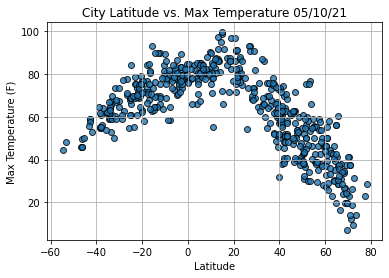

In [58]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidth=1, marker='o',
           alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

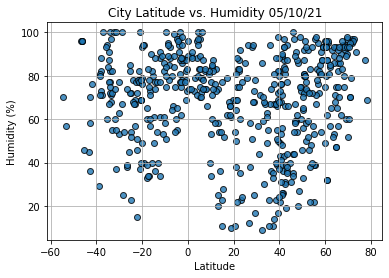

In [59]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidth=1, marker='o',
           alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

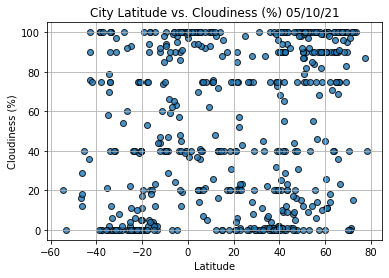

In [60]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

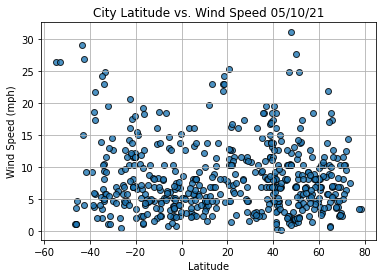

In [61]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()